## Main Question: How have arrest rates changed in comparison to crime rates?

# Hypothesis:
Before I delved into the data regarding this question, I presumed that crime rates would have significantly decreased. I have some knowledge in criminology from my degree, so I understand that crime rates have decreased since the 1990s. However, I expected arrest rates to have increased based off this; given the greater allocation of resources to law enforcement today. My analysis of the data has proven otherwise as seen.


In [48]:

# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import json


In [49]:

# Reading the file path
file_path = '/Users/natekaspar/Project1/crimesproject1.csv'
df = pd.read_csv(file_path)

df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,13239532,JG458925,10/11/2023 12:00:00 AM,054XX S WELLS ST,041A,BATTERY,AGGRAVATED - HANDGUN,GAS STATION,False,False,...,"(41.794670403, -87.631785431)",12.0,14924.0,3.0,224.0,9.0,37.0,23.0,117.0,20.0
1,13241631,JG458887,10/10/2023 11:59:00 PM,050XX S DREXEL BLVD,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",APARTMENT,False,True,...,"(41.803244589, -87.603758748)",1.0,21192.0,5.0,461.0,10.0,10.0,24.0,116.0,9.0
2,13239573,JG458880,10/10/2023 11:50:00 PM,0000X N CENTRAL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.881348498, -87.764894125)",52.0,22216.0,26.0,674.0,7.0,32.0,25.0,97.0,29.0
3,13239504,JG458877,10/10/2023 11:48:00 PM,002XX W 106TH PL,0560,ASSAULT,SIMPLE,RESIDENCE,False,False,...,"(41.700711571, -87.629208032)",45.0,21861.0,45.0,524.0,22.0,19.0,10.0,256.0,21.0
4,13242187,JG458878,10/10/2023 11:47:00 PM,086XX S ASHLAND AVE,0460,BATTERY,SIMPLE,STREET,False,True,...,"(41.737158469, -87.663097148)",18.0,21554.0,70.0,531.0,13.0,59.0,20.0,237.0,21.0


In [50]:
# Grouping
arrest_counts = df['Primary Type'].value_counts()

# Counting total occurances of each crime
total_occurrences = df['Primary Type'].value_counts()

# Counting number of arrests for each crime
arrests = df[df['Arrest'] == True]['Primary Type'].value_counts()

# Create datadrame with new info 
arrest_vs_no_arrest = pd.DataFrame({'Arrest': arrests, 'No Arrest': df[df['Arrest'] == False]['Primary Type'].value_counts(), 'Total': total_occurrences})

# Calculating the arrest rate
arrest_vs_no_arrest['Arrest Percentage'] = (arrest_vs_no_arrest['Arrest'] / arrest_vs_no_arrest['Total']) * 100

# Making data greatest to least 
arrest_vs_no_arrest_sorted = arrest_vs_no_arrest.sort_values(by='Arrest Percentage', ascending=False)

print(arrest_vs_no_arrest_sorted)

              Arrest  No Arrest    Total  Arrest Percentage
Primary Type                                               
BATTERY       316512    1128877  1445389          21.898050
ASSAULT       108940     409765   518705          21.002304
ARSON           1667      11848    13515          12.334443
BURGLARY       24464     403440   427904           5.717170


In [51]:
# Making a table that is rounded 2 decimal places
arrest_vs_no_arrest_sorted['Arrest Percentage'] = arrest_vs_no_arrest_sorted['Arrest Percentage'].round(2)
print(arrest_vs_no_arrest_sorted)

              Arrest  No Arrest    Total  Arrest Percentage
Primary Type                                               
BATTERY       316512    1128877  1445389              21.90
ASSAULT       108940     409765   518705              21.00
ARSON           1667      11848    13515              12.33
BURGLARY       24464     403440   427904               5.72



## Bar Chart
This chart helps show the overall average arrest rate of each crime for the last two decades. Battery has had highest arrest rate at about 22%. Assault is second but close to battery at about 21%. This may give the implication that many cases of assualt may also have battery charges. Arson is much lower at about 12%. Burglary has extremely low arrest rates at only about 6%. This information from the first bar chart shows us that arrest rates are very low as whole. This allows further and more specfic analysis to be compared to this average. 


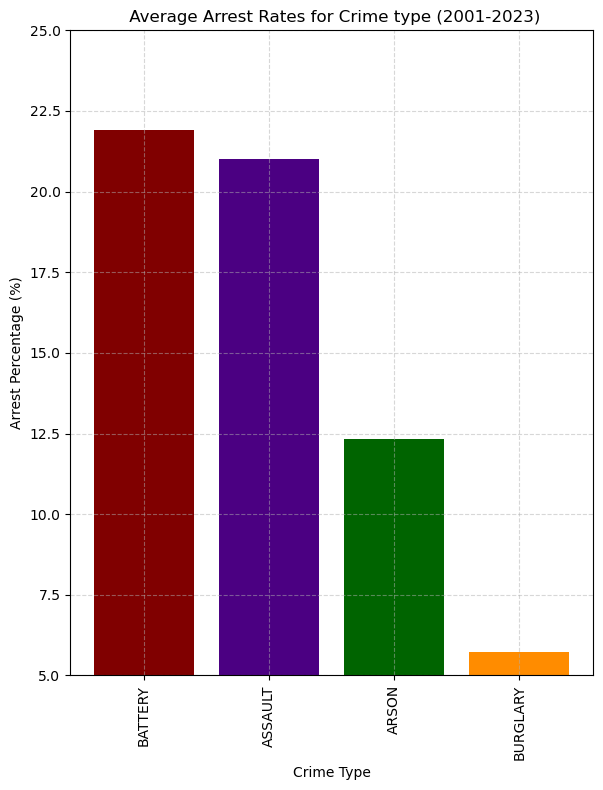

In [52]:
# Getting the data
crime_types = arrest_vs_no_arrest_sorted.index
arrest_percentages = arrest_vs_no_arrest_sorted['Arrest Percentage']

# Defining colors for each bar 
colors = ['maroon', 'indigo', 'darkgreen', 'darkorange']

# Plotting the bar chart
plt.figure(figsize=(6, 8))
plt.bar(crime_types, arrest_percentages, color=colors[:len(crime_types)])
plt.xlabel('Crime Type')
plt.ylabel('Arrest Percentage (%)')
plt.title(' Average Arrest Rates for Crime type (2001-2023)')
plt.xticks(rotation=90)
plt.tight_layout()

# Set height of the y 
plt.ylim(5, 25) 

plt.grid(True, linestyle='--', alpha=0.5)

# Save and Show 
plt.savefig('Mean_of_Arrests.png')

plt.show()


## Stacked Bar Chart
This stacked bar chart is an excellent way to emphasize the scale of how minimal the arrests were when compared to the total reported crimes. As observed in the chart, the red portion significantly overshadows the small blue bars for each type of crime. It also points out how similar assualt and battery are when it comes to arrest rates. 


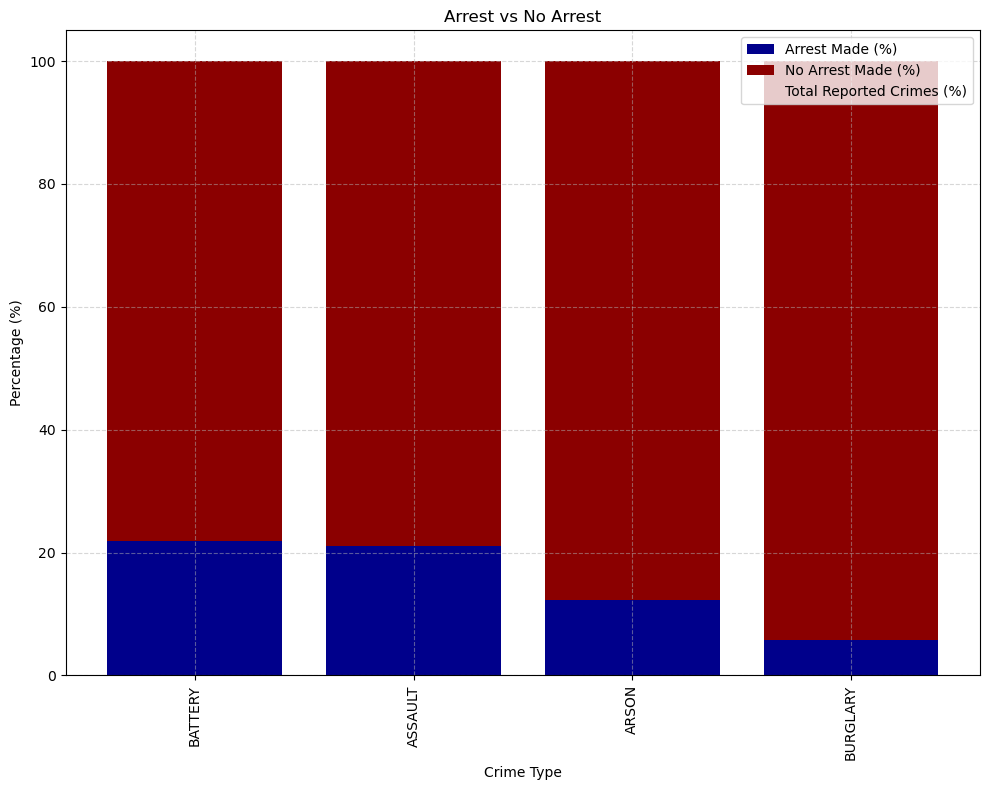

In [53]:
# Calculate total amount of reported crimes
total_percentages = 100 

# Create Stacked Bar Chart
plt.figure(figsize=(10, 8))
plt.bar(x, arrest_percentages, color='darkblue', label='Arrest Made (%)')
plt.bar(x, no_arrest_percentages, bottom=arrest_percentages, color='darkred', label='No Arrest Made (%)')
plt.bar(x, total_percentages, alpha=0, label='Total Reported Crimes (%)')  

# Setting labels
plt.xticks(x, crime_types, rotation=90)
plt.xlabel('Crime Type')
plt.ylabel('Percentage (%)')
plt.title('Arrest vs No Arrest')
plt.legend()

# Adjusting how it looks 
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

# Save and Show
plt.savefig('Arrest_vs_no_Arrest.png')



In [54]:
# Next steps looking at each year
grouped_data = df.groupby(['Year', 'Primary Type'])['Arrest'].agg(['count', 'sum']).reset_index()

# Calculating arrest rate
grouped_data['Arrest Rate'] = (grouped_data['sum'] / grouped_data['count']) * 100

# Making the years as columns and type of crime as rows
pivot_table = grouped_data.pivot(index='Primary Type', columns='Year', values='Arrest Rate')

# Rpund two decimal places and printing
pivot_table = pivot_table.round(2)

pivot_table.head()


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,17.90,15.12,14.66,14.01,17.51,16.12,13.06,9.16,11.20,12.64,...,8.56,11.48,10.27,9.01,10.99,11.44,6.97,8.70,8.77,7.38
ASSAULT,22.78,23.29,23.44,24.28,24.50,24.24,24.90,20.89,24.93,23.45,...,26.67,23.80,18.63,17.93,16.50,18.15,12.77,8.99,9.65,10.00
BATTERY,21.90,22.65,23.15,23.78,23.81,23.42,24.36,20.44,23.85,21.83,...,25.32,23.64,20.54,20.49,20.66,21.02,16.66,14.27,14.47,15.07
BURGLARY,6.52,6.51,6.40,5.61,5.54,6.42,6.24,5.92,5.28,5.23,...,6.25,5.52,4.87,5.01,5.09,5.65,5.67,4.63,4.74,4.88


## Pivot Table 
The heat based pivot table displays arrest rates for each year. A colors based scale is used to help show the higher arrest rates with a darker red. Some important main things this heat table tells us are:

-Arrest rates for Arson, Assualt, and Battery have all gone down from 2001. With high arrest rates occuring in 2014 for Assault and Battery. 

-Burglary has mostly remained at the same level but has gone down slightly. It tends to have an arrest rate of 4%-6%. This reflects the 5.7% mean.


<Figure size 1400x1000 with 0 Axes>

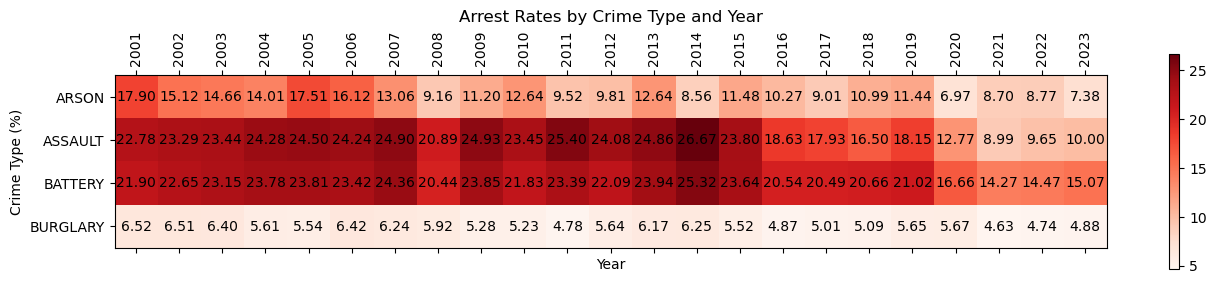

In [55]:
# Copying above chart 
grouped_data = df.groupby(['Year', 'Primary Type'])['Arrest'].agg(['count', 'sum']).reset_index()

# Calculating arrest rate
grouped_data['Arrest Rate'] = (grouped_data['sum'] / grouped_data['count']) * 100

# Making the years as columns and type of crime as rows
pivot_table = grouped_data.pivot(index='Primary Type', columns='Year', values='Arrest Rate')

# Now making it a heat based table

plt.figure(figsize=(14, 10))
cax = plt.matshow(pivot_table, cmap='Reds')
plt.colorbar(cax)

plt.title("Arrest Rates by Crime Type and Year")
plt.xlabel("Year")
plt.ylabel("Crime Type (%)")

# Setting tables
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

for i in range(len(pivot_table.index)): # goes over crime types
    for j in range(len(pivot_table.columns)): # goes over years 
        plt.text(j, i, f'{pivot_table.iloc[i, j]:.2f}', ha='center', va='center', color='black')


plt.savefig('Pivot_Heat_Table.png')

plt.show()


## Line Chart 
The line chart reflects the heat based pivot table well. It indicates how much arrest rates have dropped since 2001 well.

-One of the main things that can be seen in this chart is that Assualt and Battery both have dropped signficanlty. This could allude to a change in policing or policy that deals with how Assualt and Battery are handled.


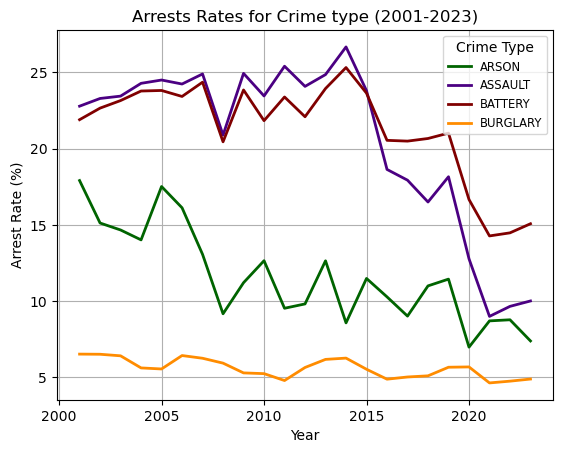

In [56]:
# Setting colors to match previous bar chart
line_graph_colors = ['darkgreen', 'indigo', 'maroon', 'darkorange']

# Create the line graph directly from table above, looping through rows
color_index = 0 
for idx, crime_type in pivot_table.iterrows():
    line_color = line_graph_colors[color_index]
    plt.plot(pivot_table.columns, crime_type, label=idx, color=line_color, linewidth=2)
    
    # Cycle through rows with color index setting, makes sure colors remain the same 
    color_index += 1
    if color_index >= len(line_graph_colors):
        color_index = 0

   
# Labelling graph
plt.title('Arrests Rates for Crime type (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.legend(title='Crime Type', loc='upper right', fontsize='small')
plt.grid(True)

plt.savefig('Line_Graph.png')  

plt.show()


# Line graph of total crimes
I used this line graph in order to compare it to the graph about total arrests. This shows a possible link between lower crime and lower arrests rates across chicago. 

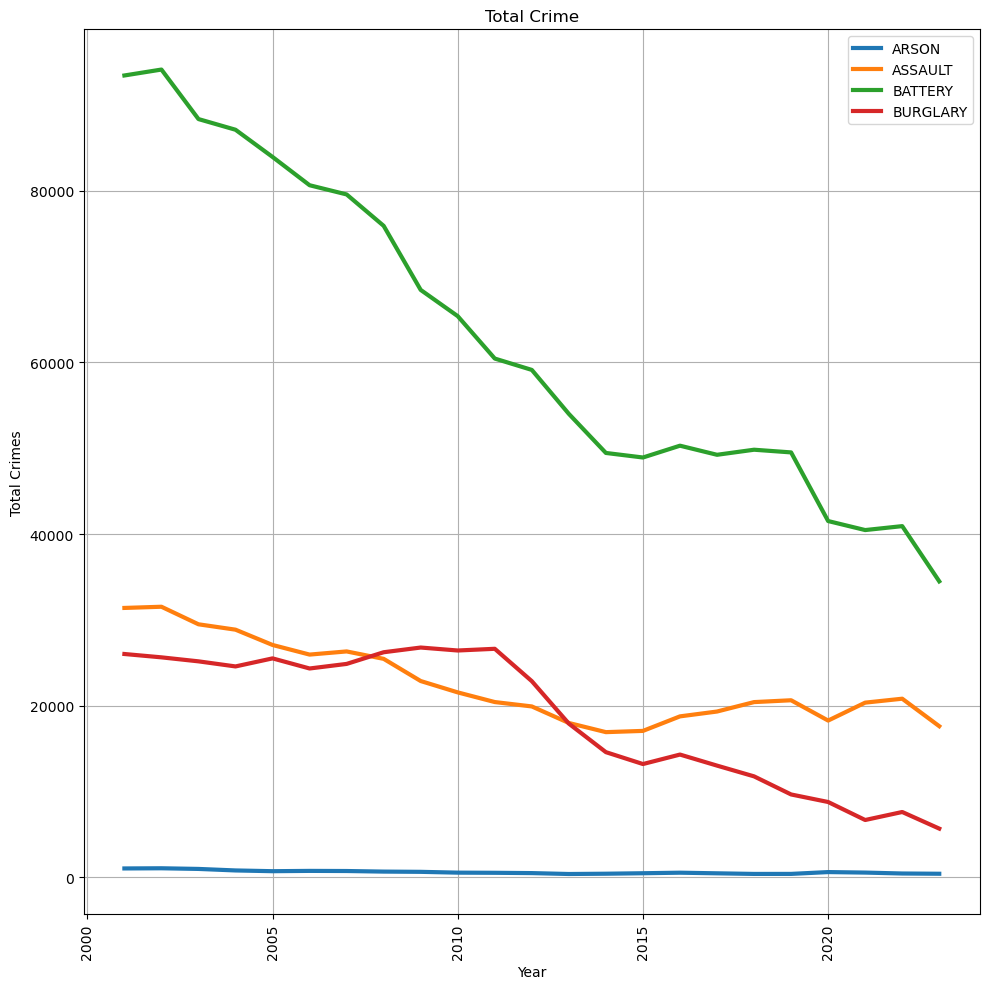

In [57]:
# Grouping the data to get the number of crimes by year 
grouped_data = df.groupby(['Year', 'Primary Type'])['Arrest'].count().reset_index()

# Making years columns and grouping data from previous table 
pivot_table = grouped_data.pivot(index='Primary Type', columns='Year', values='Arrest')


plt.figure(figsize=(10, 10))

# Creating a line chart for each type of crime 
for primary_type in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[primary_type], label=primary_type, linewidth=3)


# Add labels and title
plt.title("Total Crime")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.xticks(rotation=90)  
plt.legend()
plt.grid(True)
# Show the plot and save 
plt.tight_layout()
plt.savefig('Total_Crimes_Line_Chart.png')
plt.show()


# Analysis 
## Main Question: How have arrest rates changed from 2001 to 2023?

# Hypothesis:
Before I delved into the data regarding this question, I presumed that crime rates would have significantly decreased. I have some knowledge in criminology from my degree, so I understand that crime rates have decreased since the 1990s. However, I expected arrest rates to have increased based off this; given the greater allocation of resources to law enforcement today. My analysis of the data has proven otherwise as seen.

## Final Analysis:
Based on the information extracted, it can be seen that arrest rates have gone down quite significantly when compared to 2001. This appears to be untrue for burglary, as it has remained at around the same level consistently. Because of this, when compared to data on crime rates, it can be assumed that arrest rates do coincide with crime rates to some degree. Some important things that can be seen or inferred are:

-This data could help show which years stand out for drop of arrest rates. 2014 seems to be a standout for Assualt and Battery. Arrests for both of these crimes dropped during this year and have continued downward since. This data could be compared to policy implemented during 2014 to figure out what could have caused this and if it worked to do what it was meant to. It can also possibly show a larger distrust in the police as crimes may be going unreported. 

-Another reason for low arrest rates may be changes in resources given to police departments around the city of Chicago. 

-The drop in arrests made can also be because of the overall drop in crime across Chicago. Each crime has dropped since 2001. Battery in particular has nearly halved in cases reported. However, as mentioned, this may because of more cases going unreported. 



### Limitations of Data:
-One major limitation within the data would be unreported crime. Assualt and Battery often can be domestic which can increase the likelyhood an incident goes unreported for example. Because of this, it is hard to the know the exact instances of crime which would could lead to arrests being made. 

-More research into police policy would help possibly show reasons for the fluctuations in the data.

